<a href="https://colab.research.google.com/github/soyab266/test/blob/master/HALDLING_MISSING_DATA_PART_II(NUMERICAL_DATA_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
%matplotlib inline 
from sklearn.model_selection import train_test_split
!pip install scikit-learn==0.21.3
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler



In [5]:
df=pd.read_csv('tested.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df.drop(columns=['Name','PassengerId',	'Sex',	'SibSp',		'Ticket' ,'Cabin','Embarked','Pclass'	], inplace=True)



In [8]:
df.shape

(418, 4)

In [9]:
df.isnull().mean()

Survived    0.000000
Age         0.205742
Parch       0.000000
Fare        0.002392
dtype: float64

In [10]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [25]:
x_train, x_test, y_train, y_test= train_test_split(x,y , test_size=0.2,random_state=2)

In [12]:
x_train.shape, x_test.shape

((334, 3), (84, 3))

In [13]:
x_train.isnull().mean()

Age      0.215569
Parch    0.000000
Fare     0.002994
dtype: float64

In [14]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

In [15]:
mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()

In [16]:
x_train['mean_age']= x_train['Age'].fillna(mean_age)
x_train['median_age']= x_train['Age'].fillna(median_age)
x_train['mean_fare']=x_train['Fare'].fillna(mean_fare)
x_train['median_fare']=x_train['Fare'].fillna(median_fare)

In [17]:
x_train.sample(5)

,Age,Parch,Fare,mean_age,median_age,mean_fare,median_fare
11,46.0,0,26.0000,46.0,46.0,26.0000,26.0000
295,26.0,0,7.8958,26.0,26.0,7.8958,7.8958
318,27.0,0,7.8542,27.0,27.0,7.8542,7.8542
61,32.0,0,13.5000,32.0,32.0,13.5000,13.5000
71,21.0,0,7.8958,21.0,21.0,7.8958,7.8958


In [18]:
print(x_train['Age'].var(), x_train['mean_age'].var(),  x_train['median_age'].var())


184.70402996695034 144.76802348760972 145.67090989552426


In [19]:
print(x_train['Fare'].var(), x_train['mean_fare'].var(),  x_train['median_fare'].var())



2333.007047160699 2326.0010199920484 2327.1458643048395


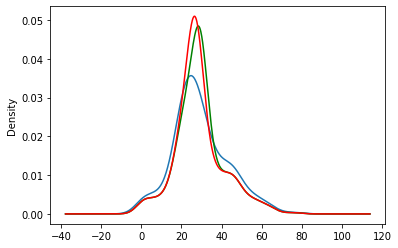

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
fig = plt.figure()
ax=fig.add_subplot(111)
x_train['Age'].plot(kind='kde', ax=ax)
x_train['mean_age'].plot(kind='kde',ax=ax, color='green')
x_train['median_age'].plot(kind='kde', ax=ax, color='red')



In [23]:
x_train.corr()

,Age,Parch,Fare,mean_age,median_age,mean_fare,median_fare
Age,1.000000,-0.172194,0.302479,1.000000,1.000000,0.298455,0.295082
Parch,-0.172194,1.000000,0.147342,-0.156446,-0.147302,0.147299,0.147800
Fare,0.302479,0.147342,1.000000,0.292746,0.309620,1.000000,1.000000
mean_age,1.000000,-0.156446,0.292746,1.000000,0.996896,0.289767,0.286540
median_age,1.000000,-0.147302,0.309620,0.996896,1.000000,0.306388,0.303117
mean_fare,0.298455,0.147299,1.000000,0.289767,0.306388,1.000000,0.999754
median_fare,0.295082,0.147800,1.000000,0.286540,0.303117,0.999754,1.000000


In [22]:
x_train.cov()

,Age,Parch,Fare,mean_age,median_age,mean_fare,median_fare
Age,184.704030,-1.727823,216.034928,184.704030,184.704030,214.533220,212.196215
Parch,-1.727823,0.517595,5.126326,-1.354239,-1.279061,5.110931,5.129568
Fare,216.034928,5.126326,2333.007047,168.654128,178.883204,2333.007047,2333.007047
mean_age,184.704030,-1.354239,168.654128,144.768023,144.768023,168.147659,166.315953
median_age,184.704030,-1.279061,178.883204,144.768023,145.670910,178.346017,176.485104
mean_fare,214.533220,5.110931,2333.007047,168.147659,178.346017,2326.001020,2326.001020
median_fare,212.196215,5.129568,2333.007047,166.315953,176.485104,2326.001020,2327.145864


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


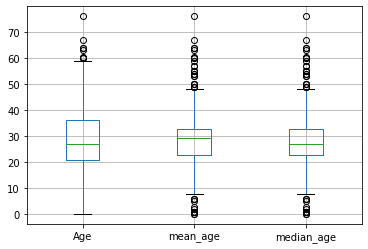

In [24]:
x_train[['Age','mean_age', 'median_age']]. boxplot()

using scikit learn for the same task.

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=2)

In [27]:
imputer1=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='median')

In [37]:
trf=ColumnTransformer([
                       ('imputer1',imputer1,['Age']),
                       ('imputer2',imputer2,['Fare'])
                       
], remainder='drop')

In [38]:
trf.fit(x_train)

ColumnTransformer(transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [44]:
trf.named_transformers_['imputer1'].statistics_

array([29.30725191])

In [45]:
trf.named_transformers_['imputer2'].statistics_

array([14.1083])

In [46]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [ ]:
x_train

always remember you need to fit x_train but transform both x_train and x_test